In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

C:\Users\abhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - loss: 0.0561
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0049
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0043
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0050
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0036
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0046
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0063
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0033
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0037
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0033
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0033
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0029
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0033
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0028
Epoch 15/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s

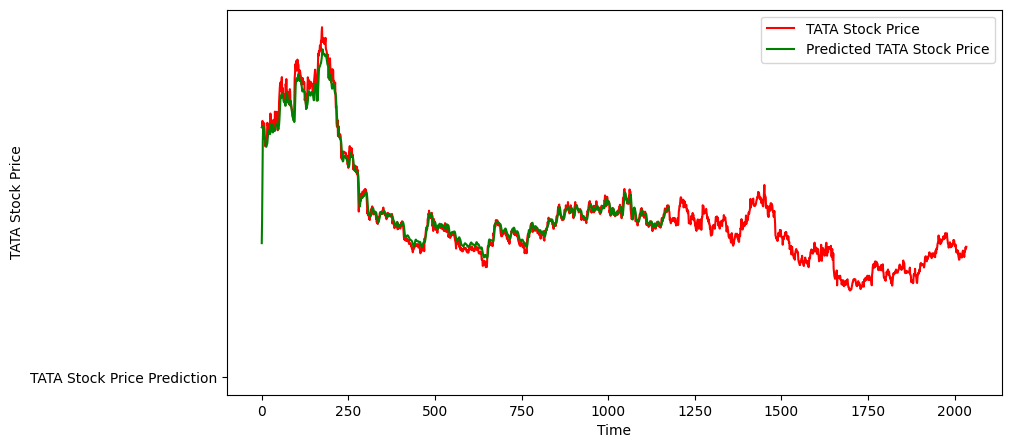

In [7]:
dataset_train = pd.read_csv(r"NSE-TATAGLOBAL.csv")
training_set = dataset_train.iloc[:, 1:2].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
X_train=[]
y_train=[]
for i in range(60, 1235):
    X_train.append(training_set_scaled[i-60:i, 0]) 
    y_train.append(training_set_scaled[i, 0])
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
dataset_test = pd.read_csv(r"NSE-TATAGLOBAL.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.figure(figsize=(10,5))
plt.plot(real_stock_price, color = 'red', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.plot('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()


C:\Users\abhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - loss: 0.0171
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.0036
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0029
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.0028
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 0.0027
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 0.0026
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - loss: 0.0020
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.0026
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 0.0016
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0022
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - loss: 0.0018
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.0016
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 0.0017
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0021
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━

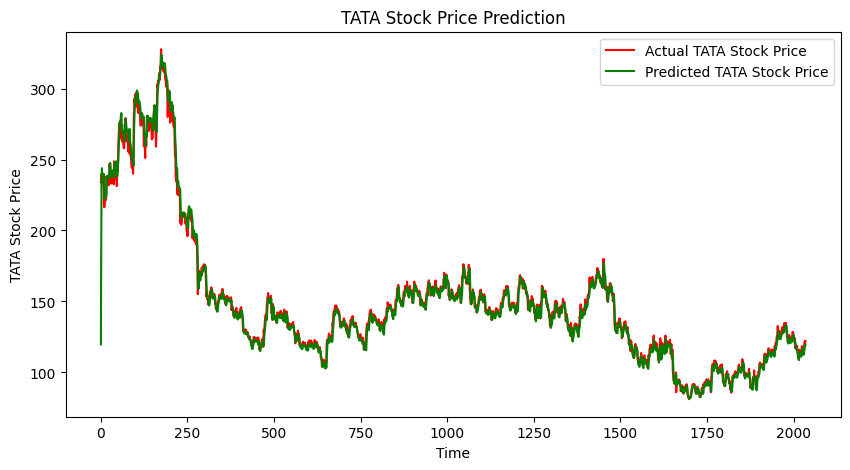

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# Load the dataset
dataset_train = pd.read_csv("NSE-TATAGLOBAL.csv")
training_set = dataset_train.iloc[:, 1:2].values

# Normalize the data
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Prepare the training data
X_train, y_train = [], []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

# Compile and train the model
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

# Prepare the test data
dataset_test = pd.read_csv("NSE-TATAGLOBAL.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict the stock prices
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Determine profit/loss and approximate future stock value
last_known_price = real_stock_price[-1][0]
predicted_future_price = predicted_stock_price[-1][0]
print("-------- last known price------->",predicted_future_price)
print("--------approximate predicted future price------->",predicted_future_price)
profit_loss = predicted_future_price - last_known_price

# Print the result
if profit_loss > 0:
    print("Expected Profit:", round(profit_loss, 2))
elif profit_loss < 0:
    print("Expected Loss:", round(abs(profit_loss), 2))
else:
    print("No Expected Change in Stock Price")

# Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(real_stock_price, color='red', label='Actual TATA Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()